In [1]:
# Import necessary libraries

from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
#model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")

In [25]:
image_dir = r"C:\Users\HP\Desktop\Object Detection\Test images"
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]

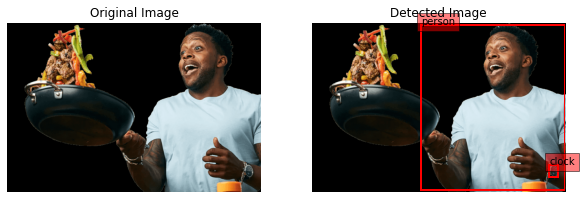

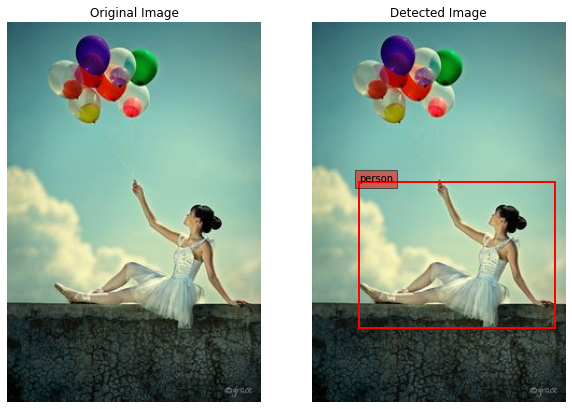

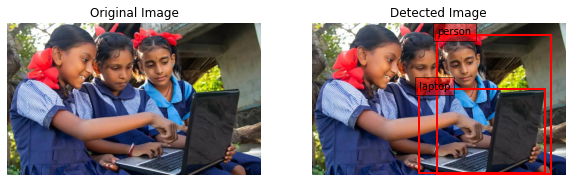

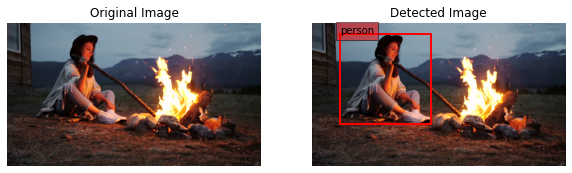

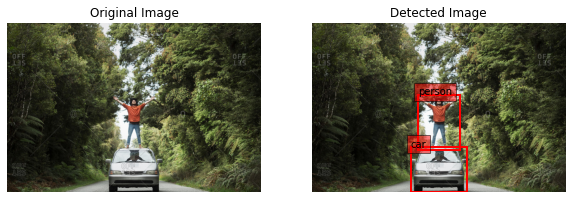

In [28]:
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path).convert("RGB")

    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    
    # Convert outputs (bounding boxes and class logits) to COCO API
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Set the figure size
    plt.figure(figsize=(10, 8))
    
    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original Image")

    # Plot the detected image
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.axis("off")
    current_axis = plt.gca()

    # Add bounding boxes and annotations to the detected image
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        class_name = model.config.id2label[label.item()]

        # Add the bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2,
                                 edgecolor="red", facecolor="none")
        current_axis.add_patch(rect)

        # Add the annotation
        plt.text(box[0], box[1], class_name, bbox=dict(facecolor="red", alpha=0.5))

    plt.title("Detected Image")
    plt.show()